In [52]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [29]:
dataset = pd.read_csv("data.csv")
dataset.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


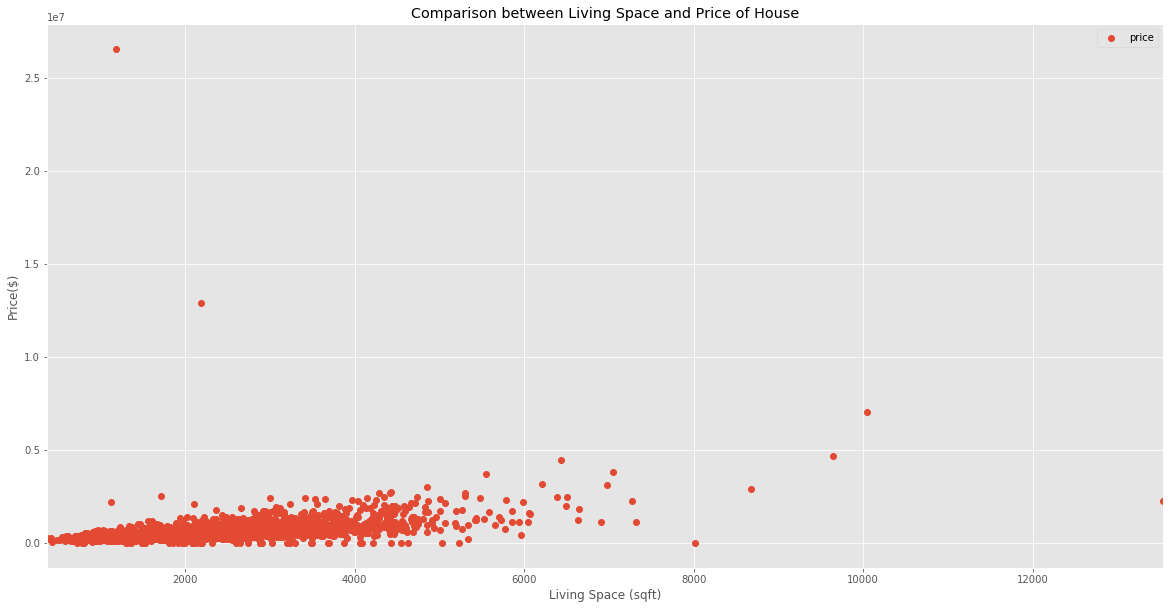

In [38]:
plt.rcParams["figure.figsize"] = (20,10)
dataset.plot(x = 'sqft_living', y = 'price', style = 'o')
plt.xlabel('Living Space (sqft)')
plt.ylabel('Price($)')
plt.title("Comparison between Living Space and Price of House")
plt.show()

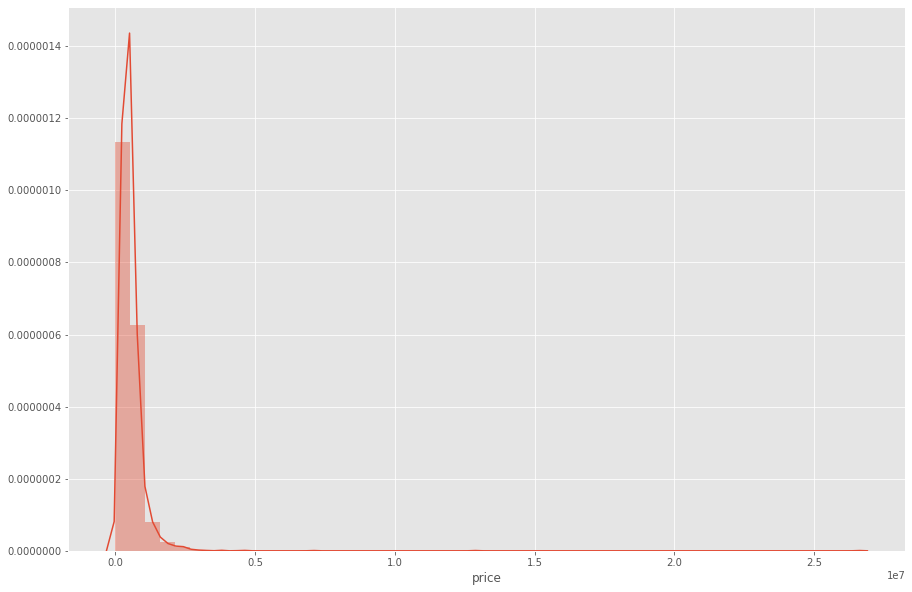

In [39]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['price'])

In [41]:
X = dataset['sqft_living'].values.reshape(-1,1) #dividing b/w Attributes and Labels
y = dataset['price'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #splitting for test/train

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[26324.65739798]
[[246.10797995]]


In [42]:
y_pred = regressor.predict(X_test) #to make predictions
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()}) #comparing actual and predicted values
df

,Actual,Predicted
0,289000.0,540690.335498
1,429900.0,676049.724471
2,129000.0,186294.844367
3,600000.0,644055.687077
4,1298000.0,712965.921464
...,...,...
915,264000.0,388103.387927
916,324000.0,271940.421390
917,83300.0,363492.589932
918,520000.0,405330.946524


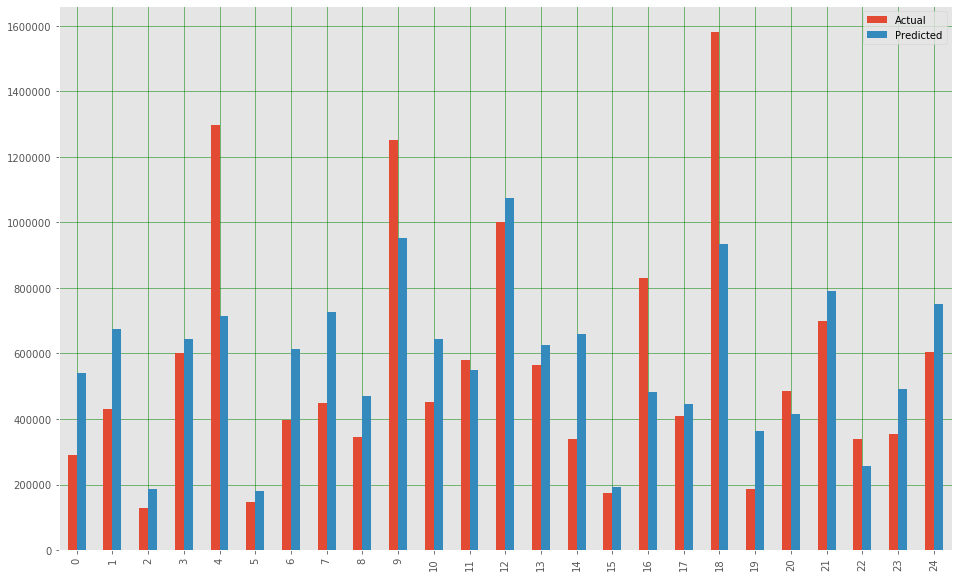

In [43]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


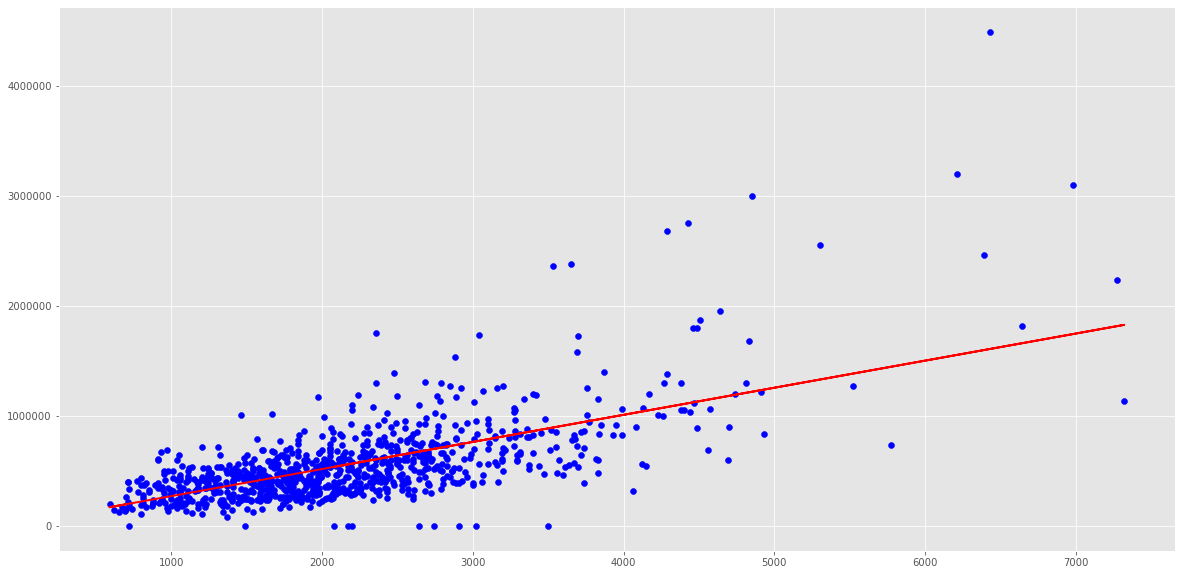

In [46]:
plt.scatter(X_test, y_test,  color='blue') #plotting points
plt.plot(X_test, y_pred, color='red', linewidth=2) #plotting a line
plt.show()